In [185]:

import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import hvplot.pandas as hvplot
import scipy.stats as stats

from pprint import pprint



In [3]:
api_key = 'gD3972hTja7jXzMfpTWNIzJjVPhJZJrc5PV8c7w9'

In [134]:
state = ["CA", "MN"]


url = f'https://api.usa.gov/crime/fbi/cde/agency/byStateAbbr/MN?API_KEY=gD3972hTja7jXzMfpTWNIzJjVPhJZJrc5PV8c7w9'

response = requests.get(url).json()

response[0]['latitude']

[{'ori': 'MN0010000',
  'agency_name': "Aitkin County Sheriff's Office",
  'agency_id': 9105,
  'state_name': 'Minnesota',
  'state_abbr': 'MN',
  'division_name': 'West North Central',
  'region_name': 'Midwest',
  'region_desc': 'Region II',
  'county_name': 'AITKIN',
  'agency_type_name': 'County',
  'nibrs': True,
  'nibrs_start_date': '2019-02-01T00:00:00.000Z',
  'latitude': '46.53333',
  'longitude': '-93.71042'},
 {'ori': 'MN0010100',
  'agency_name': 'Aitkin Police Department',
  'agency_id': 25710,
  'state_name': 'Minnesota',
  'state_abbr': 'MN',
  'division_name': 'West North Central',
  'region_name': 'Midwest',
  'region_desc': 'Region II',
  'county_name': 'AITKIN',
  'agency_type_name': 'City',
  'nibrs': True,
  'nibrs_start_date': '2019-02-01T00:00:00.000Z',
  'latitude': '46.602446',
  'longitude': '-93.41976'},
 {'ori': 'MN0010200',
  'agency_name': 'McGregor',
  'agency_id': 26898,
  'state_name': 'Minnesota',
  'state_abbr': 'MN',
  'division_name': 'West North C

In [150]:
state = ["CA", "MN", "WA", 'OH', 'TX', 'IN', 'MT']
agency = []
state_name = []
counties = ['SAN FRANCISCO', 'SAN MATEO', 'ST LOUIS', 'KING', 'DALLAS', 'MARION', 'MISSOULA', 'CUYAHOGA', "TARRANT"]
types = ['City', 'County']
lat = []
lng = []
for state in state:
    url = f'https://api.usa.gov/crime/fbi/cde/agency/byStateAbbr/{state}?API_KEY=gD3972hTja7jXzMfpTWNIzJjVPhJZJrc5PV8c7w9'
    response = requests.get(url).json()
    for i in range(len(response)):
        test = response[i]["county_name"]
        test2 = response[1]['agency_type_name']
        if test in counties and test2 in types:
            blank = response[i]['ori']
            agency.append(blank)
            state_name.append(response[i]['state_name'])
            lat.append(response[i]['latitude'])
            lng.append(response[i]['longitude'])
        else:
            print(f"{test} is not a county")


ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALAMEDA is not a county
ALPINE is not a county
AMADOR is not a county
AMADOR is not a county
AMADOR is not a county
AMADOR is not a county
AMADOR is not a county
AMADOR is not a county
BUTTE is not a county
BUTTE is not a county
BUTTE is not a county
BUTTE is not a county
BUTTE is not a county
BUTTE is not a county
BUTTE is not a county
BUTTE is not 

In [6]:
state_name

test5 = {
    "State Name":state_name,
    "Agency": agency
}

test_df = pd.DataFrame(test5)
test_df

empty_cities = []

for index, row in test_df.iterrows():
    if row['State Name']=="California":
        empty_cities.append("San Francisco, CA")
    if row['State Name']=="Minnesota":
        empty_cities.append("Virginia, MN")
    if row['State Name']=="Washington":
        empty_cities.append("Seattle, WA")
    if row['State Name']=="Ohio":
        empty_cities.append("Cleveland, OH")
    if row['State Name']=="Texas":
        empty_cities.append("Dallas, TX")
    if row['State Name']=="Indiana":
        empty_cities.append("Indianapolis, IN")
    if row['State Name']=="Montana":
        empty_cities.append("Missoula, MT")

test_df['City Name'] = empty_cities

test_df = test_df[['City Name', 'Agency']]
test_df

,City Name,Agency
0,"San Francisco, CA",CA0380000
1,"San Francisco, CA",CA0380100
2,"San Francisco, CA",CA0380300
3,"San Francisco, CA",CA0380500
4,"San Francisco, CA",CA0381900
...,...,...
221,"Indianapolis, IN",IN0495300
222,"Indianapolis, IN",INIPD0000
223,"Missoula, MT",MT0320000
224,"Missoula, MT",MT0320100


In [7]:
base_url = 'https://api.usa.gov/crime/fbi/cde'
url = f"{base_url}/arrest/agency/CA0380300/violent_crime?from=2017&to=2017&API_KEY={api_key}"
response = requests.get(url).json()
response['data'][0]['data_year']

2017

In [8]:
base_url = 'https://api.usa.gov/crime/fbi/cde'

agency

crime_simple_assault = []
crime_aggravated_assault = []
crime_robbery = []
crime_murder= []
crime_manslaughter = []
agency2 = []
year = []

for i in agency:
    url = f"{base_url}/arrest/agency/{i}/violent_crime?from=2020&to=2020&API_KEY={api_key}"
    response = requests.get(url).json()
    try:
        year.append(response['data'][0]['data_year'])
        crime_simple_assault.append(response['data'][0]['Simple Assault'])
        crime_aggravated_assault.append(response['data'][0]['Aggravated Assault'])
        crime_robbery.append(response['data'][0]['Robbery'])
        crime_murder.append(response['data'][0]['Murder and Nonnegligent Manslaughter'])
        crime_manslaughter.append(response['data'][0]['Manslaughter by Negligence'])
        agency2.append(i)
        print(f'{i}')
    except(IndexError):
        print(f"{i} has no data")

crime_df = {
    "Simple Assault" :crime_simple_assault,
    "Aggravated Assault": crime_aggravated_assault,
    "Robbery": crime_robbery,
    "Murder": crime_murder,
    "Manslaughter": crime_manslaughter,
    "Agency":agency2,
    "Year": year
    
}

df = pd.DataFrame(crime_df)
df

final_df = pd.merge(df, test_df, how="left", on="Agency")


#final_df.drop((final_df['Simple Assault']==0) & (final_df['Aggravated Assault']==0))


crime_df2021 = final_df[~((final_df['Simple Assault'] == 0) & (final_df['Aggravated Assault'] == 0) & (final_df['Robbery'] == 0) & (final_df['Murder'] == 0) & (final_df['Manslaughter'] == 0))]
crime_df2021

CA0380000 has no data
CA0380100
CA0380300
CA0380500
CA0381900 has no data
CA0389700
CA0389921 has no data
CA0389935 has no data
CA0410000
CA0410100
CA0410200
CA0410300
CA0410400
CA0410500
CA0410600
CA0410800
CA0410900
CA0411100
CA0411300
CA0411400
CA0411600
CA0411700
CA0411900
CA0412000
CA0412300
CA041240X has no data
CA0412700
CA0419930 has no data
MN0690000
MN0690200
MN0690500
MN0690600
MN0690700
MN0690800
MN0690900
MN0691000
MN0691300
MN0691400
MN0691500
MN0691700
MN0691800
MN0692100
MN0694400
MNMHP1000
MNMHP1100
WA0170000
WA0170200
WA0170400
WA0170600
WA0170700
WA0170800
WA0170900
WA0171000
WA0171100
WA0171200
WA0171300
WA0171400
WA0171500
WA0171600
WA0171700
WA0171800
WA0172000
WA0172200
WA0172300
WA0172400
WA0172500
WA0172600
WA0172700 has no data
WA0172900 has no data
WA0173100
WA0173200
WA0173600
WA0173700
WA0174000
WA0174100
WA0174200
WA0174300
WA0174700
WA0174800
WA0174900
WA0175000
WASPD0000
OH0180000
OH0180100
OH0180200
OH0180300
OH0180400 has no data
OH0180500
OH0180600
OH

,Simple Assault,Aggravated Assault,Robbery,Murder,Manslaughter,Agency,Year,City Name
0,1111,1132,249,34,2,CA0380100,2020,"San Francisco, CA"
1,3,1,1,0,0,CA0380300,2020,"San Francisco, CA"
2,51,5,18,0,0,CA0380500,2020,"San Francisco, CA"
3,21,7,1,1,0,CA0389700,2020,"San Francisco, CA"
4,141,156,23,1,0,CA0410000,2020,"San Francisco, CA"
...,...,...,...,...,...,...,...,...
178,5,1,0,0,0,IN0495300,2020,"Indianapolis, IN"
179,3391,1135,400,59,7,INIPD0000,2020,"Indianapolis, IN"
180,74,36,0,1,0,MT0320000,2020,"Missoula, MT"
181,514,132,20,3,0,MT0320100,2020,"Missoula, MT"


In [9]:
base_url = 'https://api.usa.gov/crime/fbi/cde'

agency

crime_simple_assault = []
crime_aggravated_assault = []
crime_robbery = []
crime_murder= []
crime_manslaughter = []
agency2 = []
year = []

for i in agency:
    url = f"{base_url}/arrest/agency/{i}/violent_crime?from=2017&to=2017&API_KEY={api_key}"
    response = requests.get(url).json()
    try:
        year.append(response['data'][0]['data_year'])
        crime_simple_assault.append(response['data'][0]['Simple Assault'])
        crime_aggravated_assault.append(response['data'][0]['Aggravated Assault'])
        crime_robbery.append(response['data'][0]['Robbery'])
        crime_murder.append(response['data'][0]['Murder and Nonnegligent Manslaughter'])
        crime_manslaughter.append(response['data'][0]['Manslaughter by Negligence'])
        agency2.append(i)
        print(f'{i}')
    except(IndexError):
        print(f"{i} has no data")



crime_df = {
    "Simple Assault" :crime_simple_assault,
    "Aggravated Assault": crime_aggravated_assault,
    "Robbery": crime_robbery,
    "Murder": crime_murder,
    "Manslaughter": crime_manslaughter,
    "Agency":agency2,
    "Year": year
}

df = pd.DataFrame(crime_df)
df

final_df = pd.merge(df, test_df, how="left", on="Agency")


crime_df2017 = final_df[~((final_df['Simple Assault'] == 0) & (final_df['Aggravated Assault'] == 0) & (final_df['Robbery'] == 0) & (final_df['Murder'] == 0) & (final_df['Manslaughter'] == 0))]
crime_df2017 

CA0380000 has no data
CA0380100
CA0380300
CA0380500
CA0381900 has no data
CA0389700
CA0389921 has no data
CA0389935 has no data
CA0410000
CA0410100
CA0410200
CA0410300
CA0410400
CA0410500
CA0410600
CA0410800
CA0410900
CA0411100
CA0411300
CA0411400
CA0411600
CA0411700
CA0411900
CA0412000
CA0412300
CA041240X has no data
CA0412700
CA0419930 has no data
MN0690000
MN0690200
MN0690500
MN0690600
MN0690700
MN0690800
MN0690900
MN0691000
MN0691300
MN0691400
MN0691500
MN0691700
MN0691800
MN0692100
MN0694400
MNMHP1000
MNMHP1100
WA0170000 has no data
WA0170200
WA0170400
WA0170600
WA0170700
WA0170800
WA0170900
WA0171000
WA0171100
WA0171200
WA0171300
WA0171400
WA0171500
WA0171600 has no data
WA0171700
WA0171800 has no data
WA0172000
WA0172200
WA0172300
WA0172400
WA0172500
WA0172600
WA0172700 has no data
WA0172900 has no data
WA0173100
WA0173200
WA0173600
WA0173700 has no data
WA0174000 has no data
WA0174100 has no data
WA0174200 has no data
WA0174300 has no data
WA0174700 has no data
WA0174800 has no

,Simple Assault,Aggravated Assault,Robbery,Murder,Manslaughter,Agency,Year,City Name
0,1230,1570,360,38,1,CA0380100,2017,"San Francisco, CA"
1,3,0,1,0,0,CA0380300,2017,"San Francisco, CA"
2,70,12,8,0,0,CA0380500,2017,"San Francisco, CA"
3,36,8,0,0,0,CA0389700,2017,"San Francisco, CA"
4,138,125,25,1,0,CA0410000,2017,"San Francisco, CA"
...,...,...,...,...,...,...,...,...
162,6,0,0,0,0,IN0490400,2017,"Indianapolis, IN"
164,3304,2194,749,70,4,INIPD0000,2017,"Indianapolis, IN"
165,65,32,0,0,0,MT0320000,2017,"Missoula, MT"
166,492,60,8,2,0,MT0320100,2017,"Missoula, MT"


In [21]:
#crime_df2017 = crime_df2017.drop(columns="Agency")
crime_df2021 = crime_df2021.drop(columns="Agency")

In [55]:
crime_df2021_group = crime_df2021.groupby(['City Name', 'Year']).sum()
crime_df2021_group.reset_index()

,City Name,Year,0
0,"Cleveland, OH",2020,38
1,"Dallas, TX",2020,51
2,"Indianapolis, IN",2020,7
3,"Missoula, MT",2020,3
4,"San Francisco, CA",2020,22
5,"Seattle, WA",2020,33
6,"Virginia, MN",2020,17


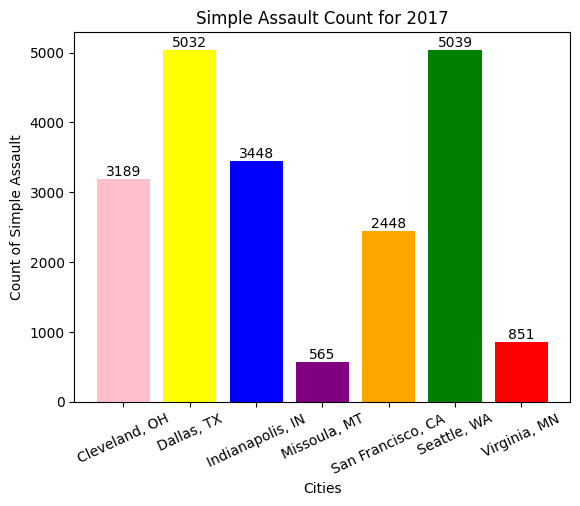

In [131]:
#crime_df2021 = crime_df2021.drop('Agency', axis=1)
crime_df2017_group = crime_df2017.groupby(['City Name', 'Year']).sum().reset_index()
#crime_df2017_group.plot.bar(x="Simple Assault")
y_axis = crime_df2017_group['Simple Assault']
x_axis = crime_df2017_group['City Name']
graph = plt.bar(x_axis, y_axis, align='center', color = ["Pink", "yellow", "blue", "purple","orange","green","red"])
plt.ylabel("Count of Simple Assault")
plt.xlabel("Cities")
plt.xticks(rotation=25)
plt.bar_label(graph,labels=y_axis,label_type="edge")
plt.title("Simple Assault Count for 2017")

plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

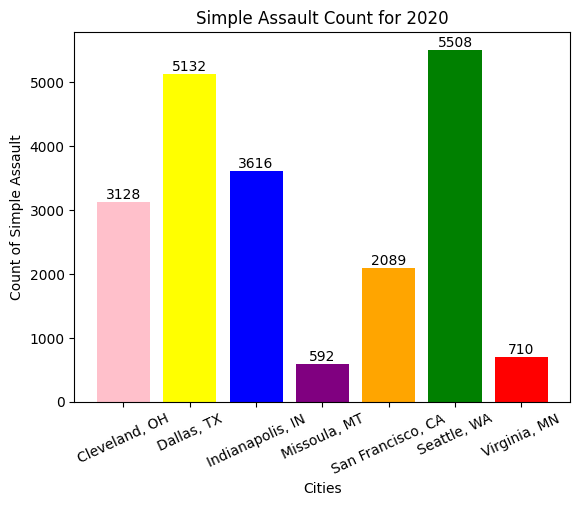

In [132]:
#crime_df2021 = crime_df2021.drop('Agency', axis=1)
crime_df2021_group = crime_df2021.groupby(['City Name', 'Year']).sum().reset_index()
#crime_df2017_group.plot.bar(x="Simple Assault")
y_axis = crime_df2021_group['Simple Assault']
x_axis = crime_df2021_group['City Name']
graph = plt.bar(x_axis, y_axis, align='center', color = ["Pink", "yellow", "blue", "purple","orange","green","red"])
plt.ylabel("Count of Simple Assault")
plt.xlabel("Cities")
plt.xticks(rotation=25)
plt.bar_label(graph,labels=y_axis,label_type="edge")
plt.title("Simple Assault Count for 2020")

plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

,Simple Assault,Aggravated Assault,Robbery,Murder,Manslaughter,Year,City Name
0,1111,1132,249,34,2,2020,"San Francisco, CA"
4,141,156,23,1,0,2020,"San Francisco, CA"
10,104,161,43,0,0,2020,"San Francisco, CA"
13,41,56,4,0,0,2020,"San Francisco, CA"
14,116,135,19,0,0,2020,"San Francisco, CA"
15,57,64,10,0,0,2020,"San Francisco, CA"
16,179,107,29,4,1,2020,"San Francisco, CA"
17,61,117,25,0,0,2020,"San Francisco, CA"
21,44,84,4,1,0,2020,"San Francisco, CA"
25,328,97,19,0,0,2020,"Virginia, MN"


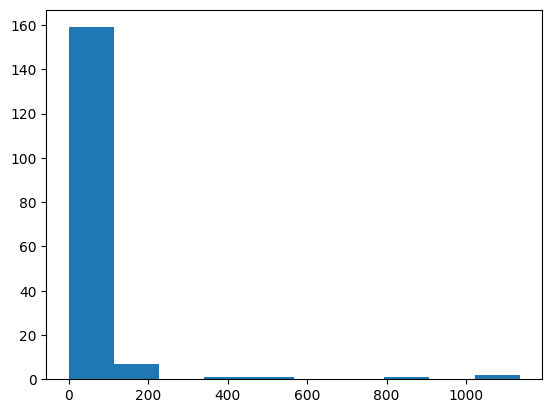

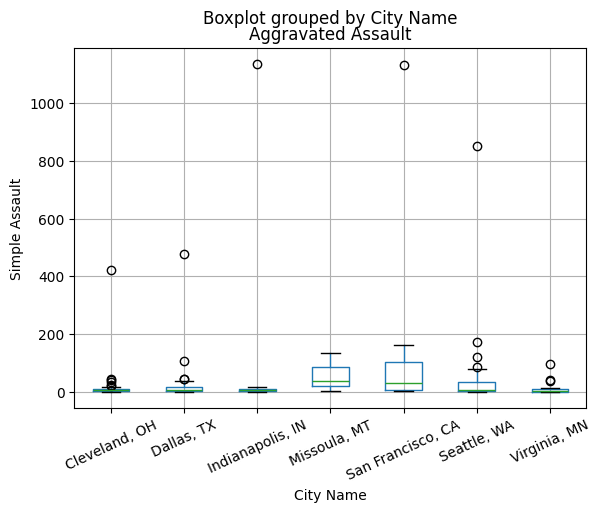

In [133]:
crime_df2021.describe()
plt.hist(crime_df2021['Aggravated Assault'])

quart = crime_df2021['Aggravated Assault'].quantile([0.25, .50, 0.75])
lowerq = quart[0.25]
upperq = quart[0.75]
iqr = upperq- lowerq


lower_bound = lowerq - 1.5*iqr
upper_bound = upperq + 1.5*iqr

#plt.boxplot(crime_df2021['Simple Assault'])

outlier = crime_df2021.loc[(crime_df2021['Aggravated Assault']< lower_bound) | (crime_df2021['Aggravated Assault'] > upper_bound)]
outlier
crime_df2021.boxplot('Aggravated Assault', by = "City Name", rot=25)
plt.ylabel("Simple Assault")
plt.savefig("output_data/Fig5.png")
outlier


In [188]:
crime_df2021['Simple Assault'].mean()

stats.ttest_1samp(crime_df2017['Simple Assault'], crime_df2021['Simple Assault'].mean())

TtestResult(statistic=0.3673383541517043, pvalue=0.7138709618251482, df=154)

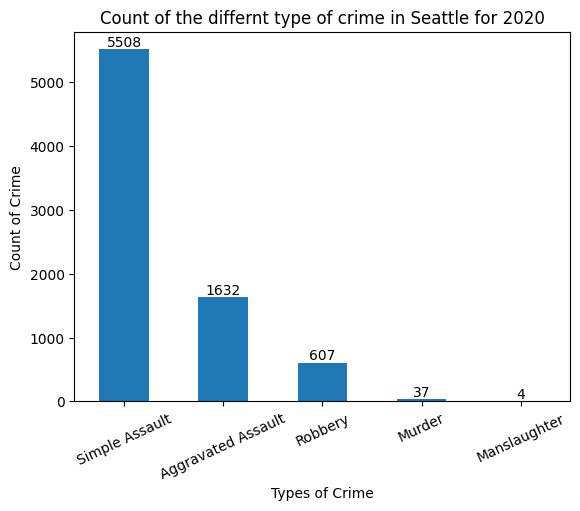

In [125]:
Seattle_df = crime_df2021[crime_df2021['City Name'] == "Seattle, WA"]
test = Seattle_df.drop(columns=['Year', 'City Name']).sum()
graph2 = test.plot.bar()
plt.ylabel("Count of Crime")
plt.xlabel("Types of Crime")
plt.title("Count of the differnt type of crime in Seattle for 2020")
plt.xticks(rotation=25)
for index, value in enumerate(test):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.savefig("output_data/Fig4.png")


In [179]:
agency3 = []
state_name = []
counties = ['ST LOUIS']
types = ['City', 'County']
lat = []
lng = []


url = f'https://api.usa.gov/crime/fbi/cde/agency/byStateAbbr/MN?API_KEY=gD3972hTja7jXzMfpTWNIzJjVPhJZJrc5PV8c7w9'
response = requests.get(url).json()
for i in range(len(response)):
    test = response[i]["county_name"]
    test2 = response[1]['agency_type_name']
    if test in counties and test2 in types:
        blank = response[i]['ori']
        agency3.append(blank)
        state_name.append(response[i]['state_name'])
        lat.append(response[i]['latitude'])
        lng.append(response[i]['longitude'])
        print("worked")
    else:
        print(f"{test} is not a county")

lat_lng = {
    "Agency":agency3,
    "Lat": lat,
    "Lng":lng
}

lat_df = pd.DataFrame(lat_lng)
lat_df

AITKIN is not a county
AITKIN is not a county
AITKIN is not a county
AITKIN is not a county
ANOKA is not a county
ANOKA is not a county
ANOKA is not a county
ANOKA is not a county
ANOKA is not a county
ANOKA is not a county
ANOKA is not a county
ANOKA is not a county
ANOKA, RAMSEY is not a county
ANOKA is not a county
ANOKA is not a county
BECKER is not a county
BECKER is not a county
BECKER is not a county
BECKER is not a county
BECKER is not a county
NOT SPECIFIED is not a county
BECKER is not a county
BELTRAMI is not a county
BELTRAMI is not a county
BELTRAMI is not a county
BENTON is not a county
BENTON is not a county
BENTON is not a county
BENTON is not a county
BIG STONE is not a county
BLUE EARTH is not a county
BLUE EARTH is not a county
BLUE EARTH is not a county
BLUE EARTH is not a county
BLUE EARTH is not a county
BLUE EARTH is not a county
BROWN is not a county
BROWN is not a county
BROWN is not a county
BROWN is not a county
BROWN, COTTONWOOD is not a county
CARLTON is no

,Agency,Lat,Lng
0,MN0690000,46.781807,-92.103836
1,MN0690200,47.578635,-92.51457
2,MN0690500,47.489307,-92.88397
3,MN0690600,47.578635,-92.51457
4,MN0690700,47.902294,-91.86373
5,MN0690800,47.46243,-92.539566
6,MN0690900,47.578635,-92.51457
7,MN0691000,47.42864,-92.92725
8,MN0691300,46.74128,-92.22634
9,MN0691400,47.522274,-92.53537


In [180]:
base_url = 'https://api.usa.gov/crime/fbi/cde'


crime_simple_assault = []
crime_aggravated_assault = []
crime_robbery = []
crime_murder= []
crime_manslaughter = []
agency5 = []
year = []

for i in agency3:
    url = f"{base_url}/arrest/agency/{i}/violent_crime?from=2020&to=2020&API_KEY={api_key}"
    response = requests.get(url).json()
    try:
        year.append(response['data'][0]['data_year'])
        crime_simple_assault.append(response['data'][0]['Simple Assault'])
        crime_aggravated_assault.append(response['data'][0]['Aggravated Assault'])
        crime_robbery.append(response['data'][0]['Robbery'])
        crime_murder.append(response['data'][0]['Murder and Nonnegligent Manslaughter'])
        crime_manslaughter.append(response['data'][0]['Manslaughter by Negligence'])
        agency5.append(i)
        print(f'{i}')
    except(IndexError):
        print(f"{i} has no data")

MN0690000
MN0690200
MN0690500
MN0690600
MN0690700
MN0690800
MN0690900
MN0691000
MN0691300
MN0691400
MN0691500
MN0691700
MN0691800
MN0692100
MN0694400
MNMHP1000
MNMHP1100


In [181]:
crime_df2 = {
    "Simple Assault" :crime_simple_assault,
    "Aggravated Assault": crime_aggravated_assault,
    "Robbery": crime_robbery,
    "Murder": crime_murder,
    "Manslaughter": crime_manslaughter,
    "Agency":agency5,
}

df = pd.DataFrame(crime_df2)
df

df_merge = pd.merge(df, lat_df, on="Agency", how = "inner")
df_merge

df_merge.fillna(0, inplace=True)

#print(df_merge['YourColumnName'].unique())

df_merge['Lat'] = df_merge['Lat'].astype(float)
df_merge['Lng'] = df_merge['Lng'].astype(float)

In [182]:
map_plot_1 = df_merge.hvplot.points(
    'Lng', 
    'Lat', 
    geo = True, 
    tiles = 'OSM',
    frame_width = 700, 
    frame_height = 500,
    size = 'Simple Assault',
    color = "Agency",
    alpha = 0.5
)

map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Agency,Simple Assault)

In [149]:
test_df = {
    "Lat": lat,
    "Lng": lng
}

test_df2 = pd.DataFrame(test_df)
test_df2

,Lat,Lng
0,47.602222,-122.33089
1,47.493554,-121.832375
2,47.204655,-121.98993
3,47.493554,-121.832375
4,47.38059,-122.23741
5,47.678806,-122.20785
6,47.493554,-121.832375
7,47.493554,-121.832375
8,47.507355,-121.79707
9,47.493554,-121.832375
